<a href="https://colab.research.google.com/github/rashmeetkaurbagal/SE.Lab.Experiments/blob/main/SE_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Waterfall Model implied to make a Weathering model.**
Comparision of a sythetical and real time model for rainfall and humidity.

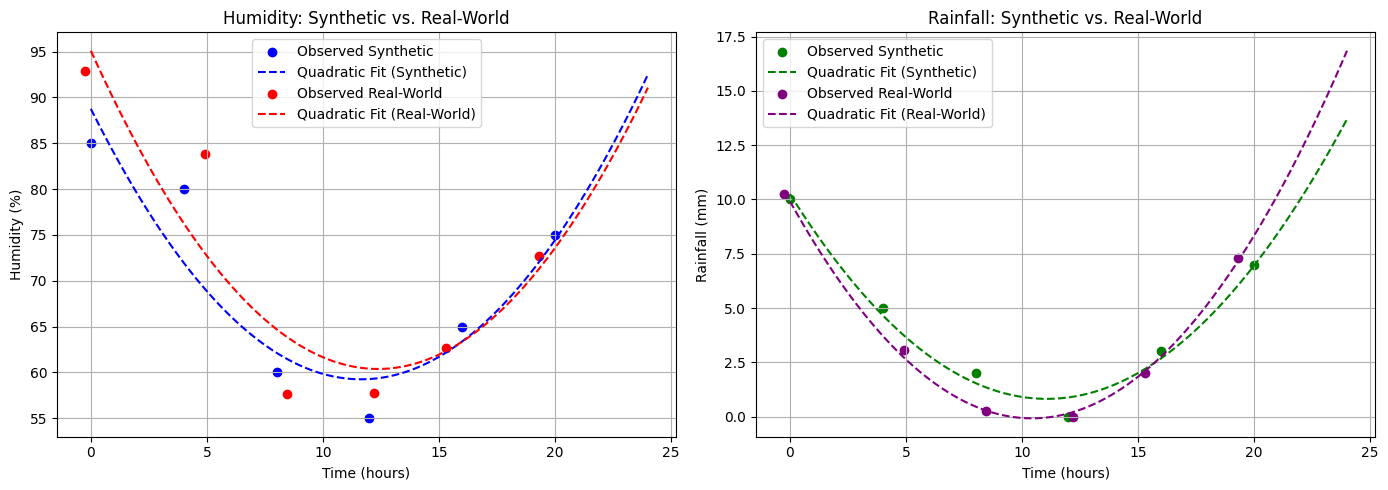

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Your original synthetic data
time_hours_synth = np.array([0, 4, 8, 12, 16, 20])
humidity_percent_synth = np.array([85, 80, 60, 55, 65, 75])
rainfall_mm_synth = np.array([10, 5, 2, 0, 3, 7])

# Simulate "real-world" data (add noise & irregular timings)
np.random.seed(42)  # For reproducibility
real_time = time_hours_synth + np.random.uniform(-1, 1, size=6)  # Irregular sampling
real_humidity = humidity_percent_synth + np.random.normal(0, 5, size=6)  # ±5% noise
real_rainfall = rainfall_mm_synth + np.random.normal(0, 1, size=6)  # ±1mm noise
real_rainfall = np.clip(real_rainfall, 0, None)  # Ensure no negative rainfall

# Fit quadratic models (synthetic vs. real)
def fit_and_plot(ax, time, values, color, label):
    coeffs = np.polyfit(time, values, 2)
    t_continuous = np.linspace(0, 24, 100)
    predicted = np.polyval(coeffs, t_continuous)
    ax.scatter(time, values, color=color, label=f'Observed {label}')
    ax.plot(t_continuous, predicted, '--', color=color, label=f'Quadratic Fit ({label})')
    return coeffs

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Humidity comparison
fit_and_plot(ax1, time_hours_synth, humidity_percent_synth, 'blue', 'Synthetic')
fit_and_plot(ax1, real_time, real_humidity, 'red', 'Real-World')
ax1.set_title('Humidity: Synthetic vs. Real-World')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Humidity (%)')
ax1.legend()
ax1.grid(True)

# Rainfall comparison
fit_and_plot(ax2, time_hours_synth, rainfall_mm_synth, 'green', 'Synthetic')
fit_and_plot(ax2, real_time, real_rainfall, 'purple', 'Real-World')
ax2.set_title('Rainfall: Synthetic vs. Real-World')
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Rainfall (mm)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()